# Congestion dynamics

## Load data

<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\yutin\AppData\Local\Temp\ipykernel_40396\567913349.py:7: SyntaxWarning: invalid escape sequence '\P'
  file_path = f'Congestion dynamics in single-file motion\PHAS_SEP\PHAS_SEP\PHASE_SEP_{dataset_index}_pos.csv'
C:\Users\yutin\AppData\Local\Temp\ipykernel_40396\567913349.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=0, usecols=[0, 1, 2, 3])


   id  frame      x      y
0   1      1  2.289 -3.225
1   1      2  2.293 -3.204
2   1      3  2.296 -3.188
3   1      4  2.298 -3.177
4   1      5  2.300 -3.170


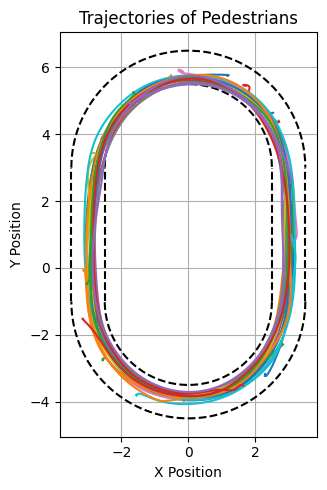

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
dataset_index = 1
file_path = f'Congestion dynamics in single-file motion\PHAS_SEP\PHAS_SEP\PHASE_SEP_{dataset_index}_pos.csv'
data = pd.read_csv(file_path, delim_whitespace=True, header=0, usecols=[0, 1, 2, 3])

data.columns = ['id', 'frame', 'x', 'y']
data = data.astype({'id': int, 'frame': int, 'x': float, 'y': float})

# Check the data
print(data.head())

# Plot trajectories and corridor boundaries
r = 3
width = 1
r_inner = r - width / 2
r_outer = r + width / 2

center_bottom = (0, -1)
center_top = (0, 3)

theta_top = np.linspace(np.pi, 0, 100)      # Bottom half circle (inner)
theta_top_outer = np.linspace(np.pi, 0, 100)  # Bottom half circle (outer)
theta_bottom = np.linspace(0, -np.pi, 100)        # Top half circle (inner)
theta_bottom_outer = np.linspace(0, -np.pi, 100)    # Top half circle (outer)

# Inner boundary
x_inner_bottom = center_bottom[0] + r_inner * np.cos(theta_bottom)
y_inner_bottom = center_bottom[1] + r_inner * np.sin(theta_bottom)

x_inner_top = center_top[0] + r_inner * np.cos(theta_top)
y_inner_top = center_top[1] + r_inner * np.sin(theta_top)

# Outer boundary
x_outer_bottom = center_bottom[0] + r_outer * np.cos(theta_bottom_outer)
y_outer_bottom = center_bottom[1] + r_outer * np.sin(theta_bottom_outer)

x_outer_top = center_top[0] + r_outer * np.cos(theta_top_outer)
y_outer_top = center_top[1] + r_outer * np.sin(theta_top_outer)


plt.figure(figsize=(10, 5))

# Plot outer boundary
plt.plot(x_outer_bottom, y_outer_bottom, 'k--')
plt.plot(x_outer_top, y_outer_top, 'k--')
plt.plot([r_outer, r_outer], [center_bottom[1], center_top[1]], 'k--')
plt.plot([-r_outer, -r_outer], [center_bottom[1], center_top[1]], 'k--')

# Plot inner boundary
plt.plot(x_inner_bottom, y_inner_bottom, 'k--')
plt.plot(x_inner_top, y_inner_top, 'k--')
plt.plot([r_inner, r_inner], [center_bottom[1], center_top[1]], 'k--')
plt.plot([-r_inner, -r_inner], [center_bottom[1], center_top[1]], 'k--')

# Plot trajectories for each person

# # plot trajectories for person 1
# data_person = data[data['id'] == 1]
# plt.plot(data_person['x'], data_person['y'], label=f'Person 1')

for person_id in data['id'].unique():
    data_person = data[data['id'] == person_id]
    plt.plot(data_person['x'], data_person['y'], label=f'Person {person_id}')

plt.title('Trajectories of Pedestrians')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

# Transformation into one dimension

   id  frame      x      y
0   1      1  2.289 -3.225
1   1      2  2.293 -3.204
2   1      3  2.296 -3.188
3   1      4  2.298 -3.177
4   1      5  2.300 -3.170
   id  frame      x      y
0   1      1  2.289 -4.225
1   1      2  2.293 -4.204
2   1      3  2.296 -4.188
3   1      4  2.298 -4.177
4   1      5  2.300 -4.170


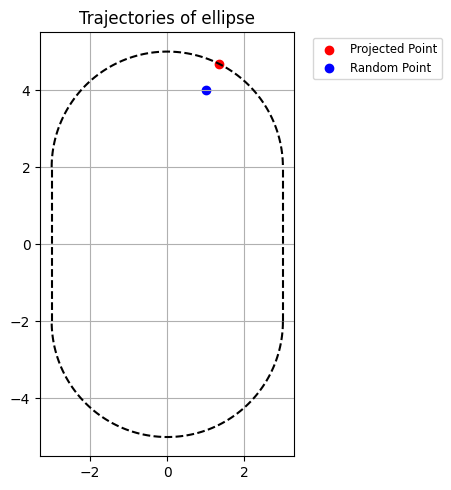

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Parameters for the running track
r = 3                      # Radius of the semicircles
l_straight = 4             # Length of the straight sections
circumference = 2*np.pi*r + l_straight * 2       # Given total circumference of the track

data_mapped = data.copy()
data_mapped['y'] = data_mapped['y'] - 1
print(data.head())
print(data_mapped.head())

# Plot trajectories and corridor boundaries
r = 3

center_bottom = (0, -2)
center_top = (0, 2)

theta_top = np.linspace(np.pi, 0, 100)      # Bottom half circle (inner)
theta_top_outer = np.linspace(np.pi, 0, 100)  # Bottom half circle (outer)
theta_bottom = np.linspace(0, -np.pi, 100)        # Top half circle (inner)
theta_bottom_outer = np.linspace(0, -np.pi, 100)    # Top half circle (outer)

# boundary
x_bottom = center_bottom[0] + r * np.cos(theta_bottom)
y_bottom = center_bottom[1] + r * np.sin(theta_bottom)

x_top = center_top[0] + r * np.cos(theta_top)
y_top = center_top[1] + r * np.sin(theta_top)

def map_to_path(x,y):
    if -2 <= y <= 2 and x >= 0:
        x_coord = r
        y_coord = y
        return x_coord, y_coord
    elif y > 2:
        x_coord = x
        y_coord = y - 2
        factor = r / np.sqrt(x_coord ** 2 + y_coord ** 2)
        x_coord *= factor
        y_coord *= factor
        return x_coord, y_coord+2
    else:
        x_temp, y_temp = map_to_path(-x, -y)
        return -x_temp, -y_temp


plt.figure(figsize=(10, 5))

# Plot boundary
plt.plot(x_bottom, y_bottom, 'k--')
plt.plot(x_top, y_top, 'k--')
plt.plot([r, r], [center_bottom[1], center_top[1]], 'k--')
plt.plot([-r, -r], [center_bottom[1], center_top[1]], 'k--')


x_random = 1
y_random = 4
x_proj, y_proj = map_to_path(x_random, y_random)
plt.scatter(x_proj, y_proj, color='red', label='Projected Point')
plt.scatter(x_random, y_random, color='blue', label='Random Point')

plt.title('Trajectories of ellipse')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()
plt.show()



# def map_to_path(x,y):

    



## Plot mapped trajectories

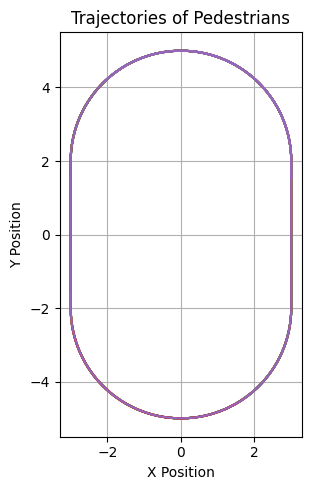

In [3]:

plt.figure(figsize=(10, 5))

# Plot trajectories for each person
for person_id in data_mapped['id'].unique():
    data_person = data_mapped[data_mapped['id'] == person_id]
    mapped_coords = data_person.apply(lambda row: map_to_path(row['x'], row['y']), axis=1)
    x_mapped, y_mapped = zip(*mapped_coords)
    plt.plot(x_mapped, y_mapped, label=f'Person {person_id}')


plt.title('Trajectories of Pedestrians')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()




### Compute 1d position of each pedestrian

In [4]:
# Compute mapped coordinates for each person
x_mapped = []
y_mapped = []
for person_id in data_mapped['id'].unique():
    data_person = data_mapped[data_mapped['id'] == person_id]
    mapped_coords = data_person.apply(lambda row: map_to_path(row['x'], row['y']), axis=1)
    x_mapped_person, y_mapped_person = zip(*mapped_coords)
    x_mapped.append(x_mapped_person)
    y_mapped.append(y_mapped_person)

# Add mapped coordinates to the DataFrame
data_mapped['x_mapped'] = np.concatenate(x_mapped)
data_mapped['y_mapped'] = np.concatenate(y_mapped)
print(data_mapped.head())

   id  frame      x      y  x_mapped  y_mapped
0   1      1  2.289 -4.225  2.151180 -4.091034
1   1      2  2.293 -4.204  2.162880 -4.078930
2   1      3  2.296 -4.188  2.171784 -4.069627
3   1      4  2.298 -4.177  2.177883 -4.063208
4   1      5  2.300 -4.170  2.182092 -4.058756


   id  frame      x      y  x_mapped  y_mapped   position
0   1      1  2.289 -4.225  2.151180 -4.091034  22.535893
1   1      2  2.293 -4.204  2.162880 -4.078930  22.552727
2   1      3  2.296 -4.188  2.171784 -4.069627  22.565604
3   1      4  2.298 -4.177  2.177883 -4.063208  22.574459
4   1      5  2.300 -4.170  2.182092 -4.058756  22.580585


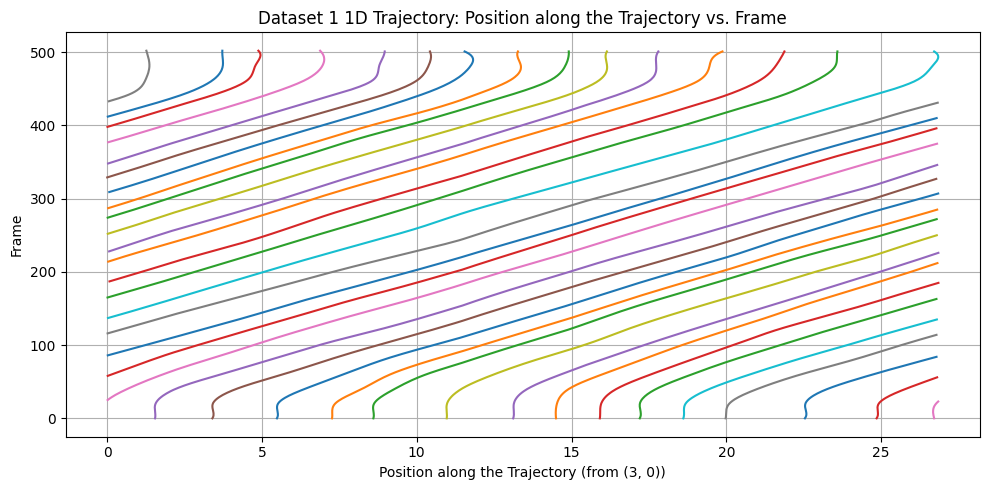

In [5]:
import os

# Compute position along the trajectory from (3, 0) for each person
def compute_position(x,y):
    if x >= 0 and 0 <= y <= 2:
        return y
    elif y > 2:
        return 2 + np.arctan2(y-2, x) * r
    elif x < 0 and -2 <= y <= 2:
        return 2 + np.pi * r + (2 - y)
    elif y < -2:
        return 2 + np.pi * r + 4 + np.arctan2(-(y + 2), -x) * r
    else:
        return 2 + 2*np.pi * r + 4 + y + 2
    
# Reset position to 0 at the starting point (3, 0)
def reset_laps(person_position):
    lap_positions = []
    for index in range(len(person_position)):
        lap_positions.append(person_position[index])
        if index < len(person_position) -1 and (person_position[index] > person_position[index + 1] + 20 or person_position[index] < person_position[index + 1] - 20):
            lap_positions.append(np.nan)
    return lap_positions

    
# Apply the function to data_mapped
data_mapped['position'] = data_mapped.apply(lambda row: compute_position(row['x_mapped'], row['y_mapped']), axis=1)
print(data_mapped.head())

# Plot position along the trajectory vs. frame
plt.figure(figsize=(10, 5))
for person_id, person_data in data_mapped.groupby('id'):
    position_list = reset_laps(person_data['position'].tolist())
    
    new_frame_list = list(range(len(position_list)))
    plt.plot(position_list, new_frame_list, label=f'Person {person_id}')

plt.title(f'Dataset {dataset_index} 1D Trajectory: Position along the Trajectory vs. Frame')
plt.xlabel('Position along the Trajectory (from (3, 0))')
plt.ylabel('Frame')
plt.grid(True)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', title="Person ID")
plt.tight_layout()

save_dir = os.path.join(os.getcwd(), "plots")
save_path = os.path.join(save_dir, f"trajectory_{dataset_index}.png")
plt.savefig(save_path, dpi=300) 

plt.show()

## ODE

$$\dot{l}_i = c_i (1 - \frac{s_i}{l_{i+1} - l_i})$$

In [67]:
# import pickle
# data_mapped = pickle.load(open(f"cleaned_data/data_{dataset_index}.pkl", "rb"))

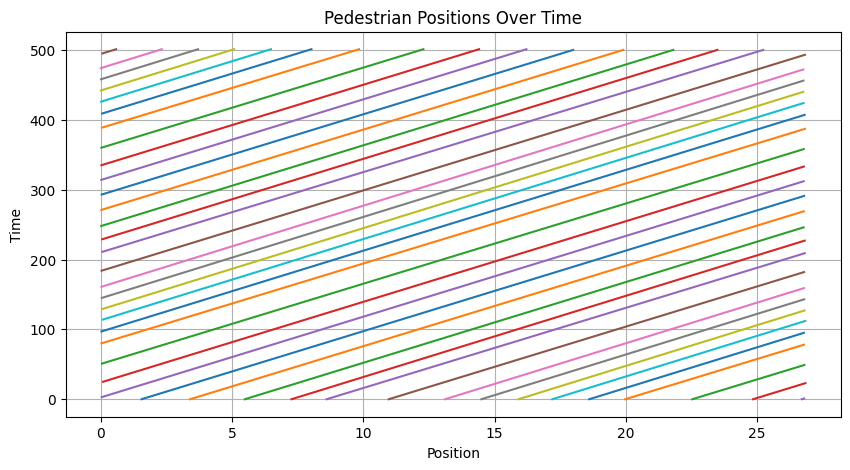

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ODE system for pedestrian movement
def pedestrian_ode(t, l, c, s):
    n = len(l)  # Number of pedestrians
    dl_dt = np.zeros(n)
    
    for i in range(n): 
        if i == n - 1:
            gap = l[0] - (l[i] - circumference)
        else:
            gap = l[i + 1] - l[i]
        if gap > s: 
            dl_dt[i] = c[i] * (1 - s / gap)
        else:
            dl_dt[i] = 0  # If too close, pedestrian stops
    
    return dl_dt

def second_order_pedestrian_ode(t, y, c, s, tau=0.1):
    """
    Second-order pedestrian model:
    y = [x_0, ..., x_n, u_0, ..., u_n]  (positions + velocities)
    """
    # Default circumference
    circumference = 2*np.pi*3 + 4 * 2

    n = len(y) // 2  # Number of pedestrians
    x = y[:n]  # Positions
    u = y[n:]  # Velocities

    dxdt = u  # dx/dt = velocity
    dudt = np.zeros(n)  # Initialize acceleration
    
    for i in range(n): 
        next_index = (i + 1) % n  # Wrap around for circular track
        gap = (x[next_index] - x[i]) % circumference  # Circular gap
        if gap > s:
            desired_velocity = c[i] * (1 - s / gap)  # Desired velocity based on gap
            dudt[i] = (desired_velocity - u[i]) / tau  # Acceleration towards desired velocity
        else:
            dudt[i] = -u[i] / tau  # Deceleration if too close
        
    return np.concatenate([dxdt, dudt])  # Return both position and velocity derivatives

# Initialize parameters
num_pedestrians = data_mapped['id'].nunique()
mean_speed = 1.42
std_dev_speed = 0.2
# c_values = np.random.normal(mean_speed, std_dev_speed, num_pedestrians)  # Random walking speeds normally distributed
# c_values = np.clip(c_values, 0.5, 3.0)
# s_value = 0.4  # Safety distance

c_values = []
for pedestrian in range(len(data_mapped['id'].unique())):
    c_values.append(0.08873866)

s_value = 0.04567424




# Initial positions 
initial_positions = data_mapped.groupby('id')['position'].first().values
initial_positions = np.sort(initial_positions)
# initial_positions = np.linspace(0, circumference, num_pedestrians)

# Time span for simulation
t_span = (0, 500)  # 500 frames
t_eval = np.linspace(0, 500, 500)  # Generate 500 frame steps

# Solve the ivp 
sol = solve_ivp(pedestrian_ode, t_span, initial_positions, args=(c_values, s_value), t_eval=t_eval)
positions_over_time = sol.y

positions_over_time = positions_over_time % circumference

# Plot pedestrian positions over time
plt.figure(figsize=(10, 5))
for i in range(num_pedestrians):

    position_list = reset_laps(positions_over_time[i, :].tolist())
    
    new_frame_list = list(range(len(position_list)))
    plt.plot(position_list, new_frame_list, label=f'Person {i+1}')

plt.title('Pedestrian Positions Over Time')
plt.ylabel('Time')
plt.xlabel('Position')
plt.grid(True)
plt.show()

# TODO: plot the data to the corridor to show a movie (Done)
# Normal distribution for s and c (Done)
# Compute loss function and argmin
# Train neural network NN(l_i+1 - l_i) 

In [28]:
os.makedirs('mapped_data', exist_ok=True)
data_mapped.to_pickle(f'mapped_data/data_mapped_{dataset_index}.pkl')

## Compare CBX result with actual result

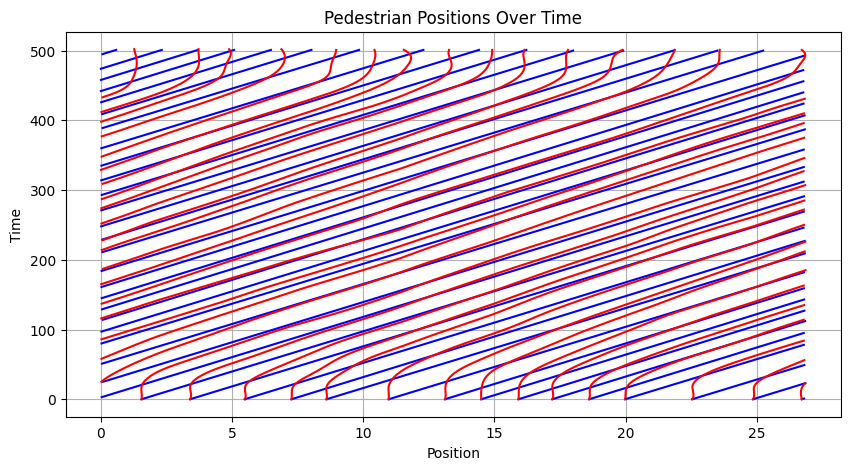

In [10]:
# Plot pedestrian positions over time
plt.figure(figsize=(10, 5))
for i in range(num_pedestrians):

    position_list = reset_laps(positions_over_time[i, :].tolist())
    
    new_frame_list = list(range(len(position_list)))
    plt.plot(position_list, new_frame_list, color='blue')

for person_id, person_data in data_mapped.groupby('id'):
    position_list = reset_laps(person_data['position'].tolist())
    
    new_frame_list = list(range(len(position_list)))
    plt.plot(position_list, new_frame_list, color='red')

plt.title('Pedestrian Positions Over Time')
plt.ylabel('Time')
plt.xlabel('Position')
plt.grid(True)
plt.show()

## Movie

In [10]:
%matplotlib widget

In [11]:
# Duration of video of each dataset
durations = [52, 76, 179, 320, 147, 177]

In [ ]:
dataset_index = 1

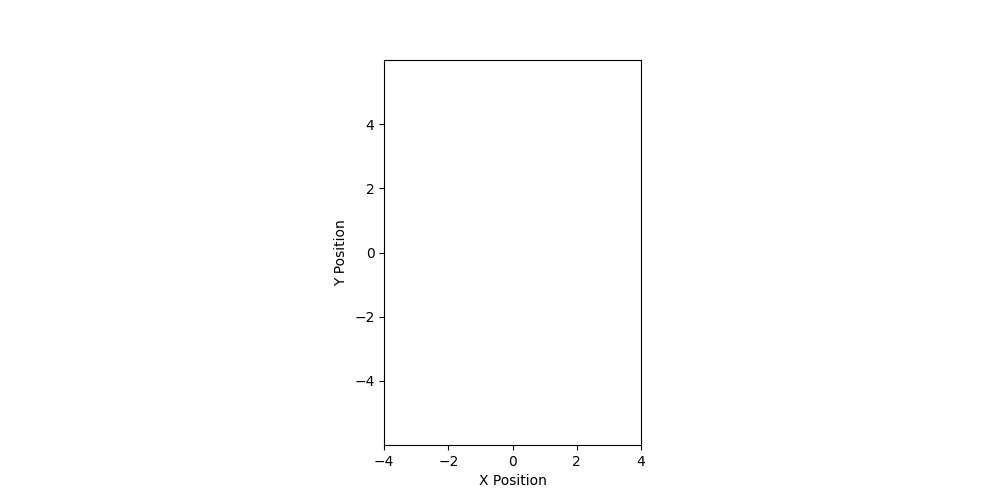

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

num_pedestrians = data_mapped['id'].nunique()
num_frames = data_mapped['frame'].nunique()

video_duration = durations[dataset_index - 1]
FPS = num_frames / video_duration
# Time between two frames in milliseconds
interval = 1000 / FPS

# Map data into shape of (num_pedestrian, num_frames, 2)
pedestrian_trajectories = np.full((num_pedestrians, data_mapped['frame'].nunique(), 2), np.nan)
pedestrian_ids = data_mapped['id'].unique()
id_to_index = {pid: idx for idx, pid in enumerate(pedestrian_ids)}
for _, row in data_mapped.iterrows():
    pid_index = id_to_index[row['id']]
    frame_index = int(row['frame']) - 1 
    pedestrian_trajectories[pid_index, frame_index] = [row['x_mapped'], row['y_mapped']]


# Set up figure
colors = plt.cm.jet(np.linspace(0, 1, num_pedestrians))

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(np.min(data_mapped['x_mapped']) - 1, np.max(data_mapped['x_mapped']) + 1)
ax.set_ylim(np.min(data_mapped['y_mapped']) - 1, np.max(data_mapped['y_mapped']) + 1)
dummy_data = np.full(num_pedestrians, np.nan)
scatters = ax.scatter(dummy_data, dummy_data, c=colors, s=50)
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
plt.gca().set_aspect('equal', adjustable='box')


# Animation update function
def update(frame):
    x_data = pedestrian_trajectories[:, frame, 0]  
    y_data = pedestrian_trajectories[:, frame, 1]  
    scatters.set_offsets(np.c_[x_data, y_data])  # Update scatter plot
    return scatters,

# Create animation
ani = animation.FuncAnimation(fig, update, frames=num_frames, interval=interval, blit=True)
# ani.save(f"pedestrian_animation{dataset_index}.mp4", fps=FPS, extra_args=['-vcodec', 'libx264'])

# Display animation
plt.show()
    


## Loss function

$$j(t) = \frac{1}{N} \sum_{i=1}^N \frac{1}{2} (\hat{x}_i (t) - x_i (t))^2$$

$$ J = \int_0^T e^{-t/T} j(t) dt$$